In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/eff-btrfly

/content/drive/MyDrive/Colab Notebooks/eff-btrfly


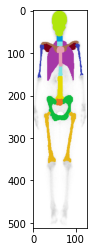

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

#img = plt.imread('./data 2/indo/segmentation/depan/not done/011.png')
img = plt.imread('./data-original/indo/segmentation/011.png')
plt.imshow(img)

In [4]:
'''
tengkorak         : hijau       : 0.6901961   0.9019608  0.050980393 : 176, 230,  13
vertebra serviks  : biru        : 0.0         0.5921569  0.85882354  :   0, 151, 219
vertebra toraks   : biru muda   : 0.49411765  0.9019608  0.8862745   : 126, 230, 225
tulang rusuk      : ungu        : 0.6509804   0.21568628 0.654902    : 166,  55, 167
tulang dada       : merah muda  : 0.9019608   0.6156863  0.7058824   : 230, 157, 180
tulang selangka   : coklat muda : 0.654902    0.43137255 0.3019608   : 167, 110,  77
tulang belikat    : coklat tua  : 0.47843137  0.0        0.09411765  : 121,   0,  24
humerus           : biru tua    : 0.22352941  0.25490198 0.72156864  :  56,  65, 184
vertebra lumbalis : kuning      : 0.9019608   0.85490197 0.0         : 230, 218,   0
tulang selangka   : jingga      : 0.9019608   0.44705883 0.13725491  : 230, 114,  35
panggul           : hijau tua   : 0.050980393 0.7372549  0.24313726  :  13, 187,  62
tulang paha       : emas        : 0.9019608   0.7137255  0.08627451  : 230, 182,  22
'''

print()

In [5]:
mapper = [
    '0.6901961 0.9019608 0.050980393',
    '0.0 0.5921569 0.85882354',
    '0.49411765 0.9019608 0.8862745',
    '0.6509804 0.21568628 0.654902',
    '0.9019608 0.6156863 0.7058824',
    '0.654902 0.43137255 0.3019608',
    '0.47843137 0.0 0.09411765',
    '0.22352941 0.25490198 0.72156864',
    '0.9019608 0.85490197 0.0',
    '0.9019608 0.44705883 0.13725491',
    '0.050980393 0.7372549 0.24313726',
    '0.9019608 0.7137255 0.08627451',
]

mapper = {
    mapper[i-1] : f'{i / 12} {i / 12} {i / 12}' for i in range(1, 13)
}

In [6]:
def preprocess_data(img, mapper=mapper):
    
    tmp = pd.DataFrame(
        img.reshape(512 * 128, 3)
    ).astype(str)
    
    tmp = tmp[0] + ' ' + tmp[1] + ' ' + tmp[2]
    tmp = tmp.apply(
        lambda x : mapper[x].split(' ') if x in mapper.keys() else '0.0 0.0 0.0'.split(' ')
    ).to_list()
    
    return pd.DataFrame(tmp).astype(float).to_numpy().reshape(512, 128, 3)

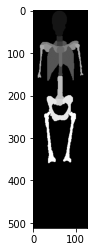

In [7]:
plt.imshow(preprocess_data(img))